Impact of Tax Revenue (as % of GDP) on GDP per Capita

**Name:** HW1 Munkhjargal Nomin-Erdene
**Topic:** Does higher tax revenue (as a percentage of GDP) correlate with higher GDP per capita across countries?
**Dataset:** Tax revenue (% of GDP), GDP per capita 2000-2021
**Analysis:** Merged these datasets by country and year, then performed regression and correlation analysis to see if there's a relationship between tax revenue and economic performance (GDP per capita).


In [3]:
import sys
sys.path.append('../../../src')
from data_processing import GDP_percapita, tax_revenue, merge_gdp_tax, describe_stats

# Paths
gdp_raw_path = '../../../data/raw/GDP_raw.csv'
tax_raw_path = '../../../data/raw/taxrevenue_raw.csv'
gdp_processed_path = '../../../data/processed/GDP_percapita.csv'
tax_processed_path = '../../../data/processed/TaxRevenue.csv'

# Process individual datasets
gdp_df = GDP_percapita(gdp_raw_path, gdp_processed_path)
tax_df = tax_revenue(tax_raw_path, tax_processed_path)

# Merge
merged_df = merge_gdp_tax(gdp_df, tax_df)

# Descriptive stats
print(describe_stats(merged_df))

# Optional: Correlation
print(merged_df[['GDP_percapita', 'TaxRevenue_percent_GDP']].corr())
# Optional: Save merged DataFrame
merged_df.to_csv('../../../data/processed/Merged_GDP_TaxRevenue.csv', index=False)
# Optional: Save descriptive statistics
desc_stats = describe_stats(merged_df)
desc_stats.to_csv('../../../data/processed/Descriptive_Statistics.csv', index=False)
# Optional: Save correlation matrix
corr_matrix = merged_df[['GDP_percapita', 'TaxRevenue_percent_GDP']].corr()
corr_matrix.to_csv('../../../data/processed/Correlation_Matrix.csv')


       GDP_percapita  TaxRevenue_percent_GDP
count    1401.000000              980.000000
mean    13420.602276               15.361835
std     16734.617112                5.281654
min       109.593814                0.914773
25%      2041.428637               11.822314
50%      5634.083932               14.609040
75%     18744.319228               18.371737
max    105561.137469               31.985884
                        GDP_percapita  TaxRevenue_percent_GDP
GDP_percapita                1.000000                0.341616
TaxRevenue_percent_GDP       0.341616                1.000000


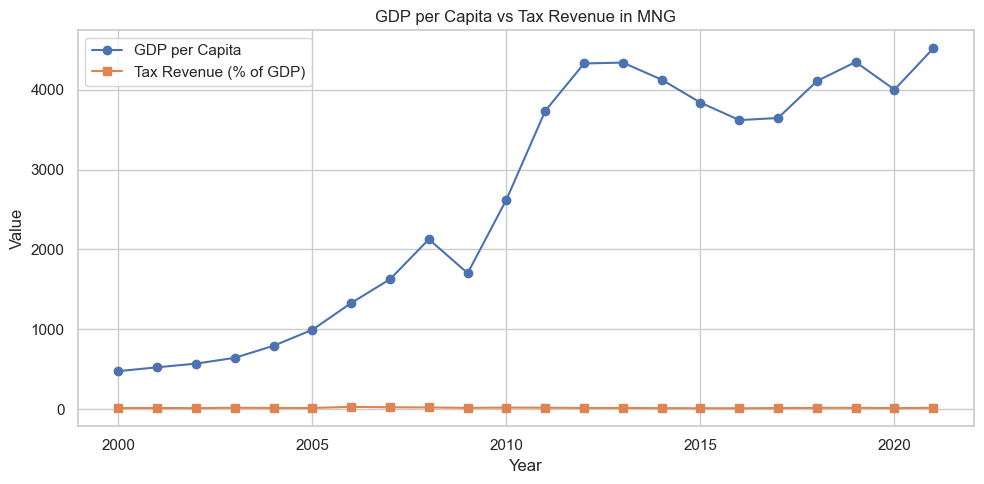

In [16]:
import matplotlib.pyplot as plt


country = 'MNG'
df_mongolia = merged_df[merged_df['ISO3'] == country]

plt.figure(figsize=(10, 5))
plt.plot(df_mongolia['Year'], df_mongolia['GDP_percapita'], marker='o', label='GDP per Capita')
plt.plot(df_mongolia['Year'], df_mongolia['TaxRevenue_percent_GDP'], marker='s', label='Tax Revenue (% of GDP)')
plt.title(f'GDP per Capita vs Tax Revenue in {country}')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


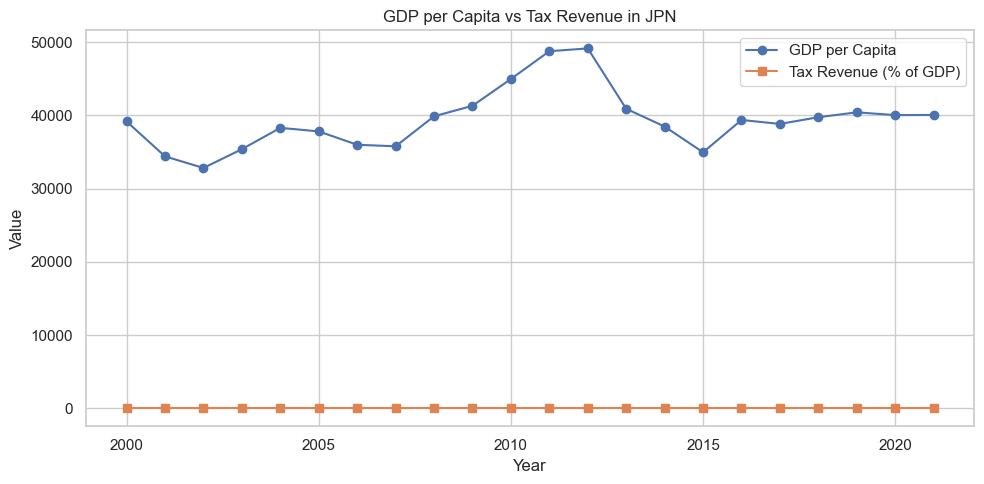

In [18]:
import matplotlib.pyplot as plt


country = 'JPN'
df_japan = merged_df[merged_df['ISO3'] == country]

plt.figure(figsize=(10, 5))
plt.plot(df_japan['Year'], df_japan['GDP_percapita'], marker='o', label='GDP per Capita')
plt.plot(df_japan['Year'], df_japan['TaxRevenue_percent_GDP'], marker='s', label='Tax Revenue (% of GDP)')
plt.title(f'GDP per Capita vs Tax Revenue in {country}')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

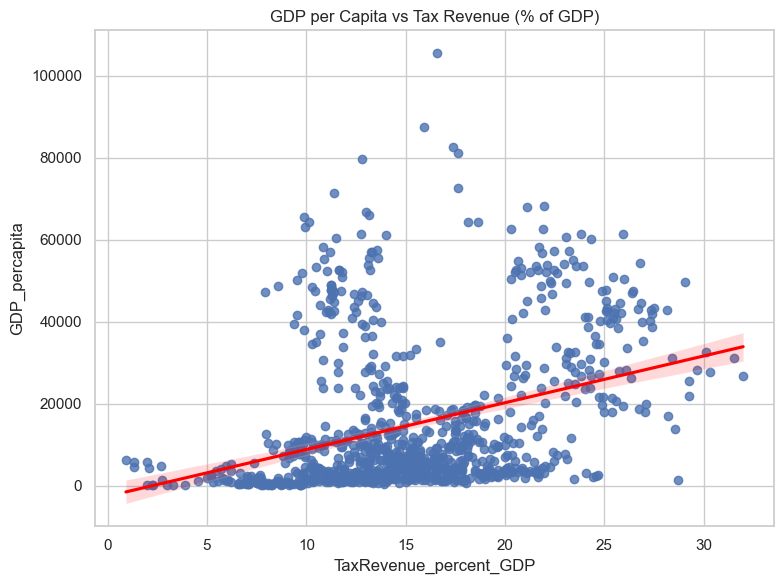

In [6]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.regplot(
    data=merged_df,
    x='TaxRevenue_percent_GDP',
    y='GDP_percapita',
    line_kws={'color': 'red'}
)
plt.title('GDP per Capita vs Tax Revenue (% of GDP)')
plt.tight_layout()
plt.show()


In [19]:


import statsmodels.api as sm

X = merged_df['TaxRevenue_percent_GDP']
y = merged_df['GDP_percapita']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          GDP_percapita   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     140.1
Date:                Thu, 01 May 2025   Prob (F-statistic):           7.14e-31
Time:                        20:45:39   Log-Likelihood:                -15620.
No. Observations:                1408   AIC:                         3.124e+04
Df Residuals:                    1406   BIC:                         3.125e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -4098

In [9]:
# Check for missing values in X and y
print(X.isna().sum())  # For the predictor variables
print(y.isna().sum())  # For the target variable

# Check for infinite values
print((X == float('inf')).sum())
print((X == -float('inf')).sum())


const                       0
TaxRevenue_percent_GDP    428
dtype: int64
7
const                     0
TaxRevenue_percent_GDP    0
dtype: int64
const                     0
TaxRevenue_percent_GDP    0
dtype: int64


In [10]:
# Drop rows with NaN or Inf values from both X and y
merged_df_clean = merged_df.dropna(subset=['GDP_percapita', 'TaxRevenue_percent_GDP'])
X_clean = merged_df_clean['TaxRevenue_percent_GDP']
y_clean = merged_df_clean['GDP_percapita']
X_clean = sm.add_constant(X_clean)

# Run OLS regression on the cleaned data
model = sm.OLS(y_clean, X_clean).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          GDP_percapita   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     129.2
Date:                Thu, 01 May 2025   Prob (F-statistic):           3.28e-28
Time:                        20:19:43   Log-Likelihood:                -10911.
No. Observations:                 980   AIC:                         2.183e+04
Df Residuals:                     978   BIC:                         2.184e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2587

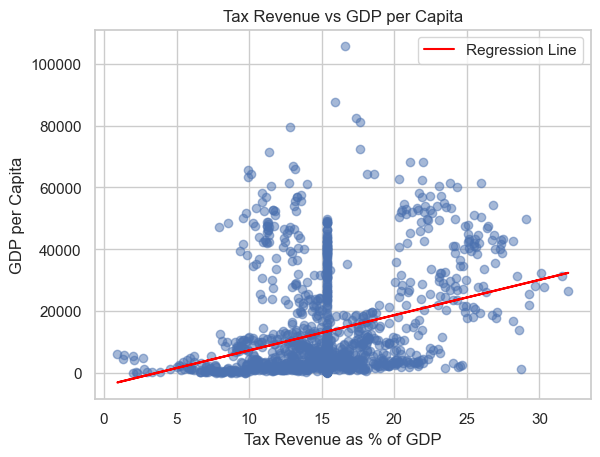

In [12]:
import matplotlib.pyplot as plt

# Plot the regression line
plt.scatter(merged_df['TaxRevenue_percent_GDP'], merged_df['GDP_percapita'], alpha=0.5)
plt.plot(merged_df['TaxRevenue_percent_GDP'], model.fittedvalues, color='red', label='Regression Line')
plt.xlabel('Tax Revenue as % of GDP')
plt.ylabel('GDP per Capita')
plt.title('Tax Revenue vs GDP per Capita')
plt.legend()
plt.show()
